In [ ]:
# Limpieza de la base de datos
import pandas as pd
import numpy as np

df = pd.read_csv(  # Lectura de datos
    "../archive/BBDD Población Chile (1b).xlsx - Tabla ajustada población .csv",
    index_col=0
)


df = df.T  # Transposicion

# notacion europea a float
for col in df.columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
    )

df = df.replace(["NaN", "nan", "NAN", "None", ""], np.nan)
df = df.fillna(0)

df = df.apply(pd.to_numeric)




print(df)

df.to_csv("../data/output.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'archive/BBDD Población Chile (1b).xlsx - Tabla ajustada población .csv'

In [1]:
#regresion
import statsmodels.api as sm

x_J=df[["Población total de adultos (15-64)","Población total de jovenes (0-14)"]]
y_J=df["dJ"]

x_J=sm.add_constant(x_J)
modelo_J = sm.OLS(y_J,x_J).fit()



x_A=df[["Población total de jovenes (0-14)","Población total de adultos (15-64)"]]
y_A=df["dA"]
x_A=sm.add_constant(x_A)
modelo_A=sm.OLS(y_A,x_A).fit()

x_E=df[["Población total de adultos (15-64)","Poblacion total mayores (65+ años)"]]
y_E=df["dM"]
x_E=sm.add_constant(x_E)
modelo_E=sm.OLS(y_E,x_E).fit()

print(modelo_J.summary())
print(modelo_A.summary())
print(modelo_E.summary())


NameError: name 'df' is not defined

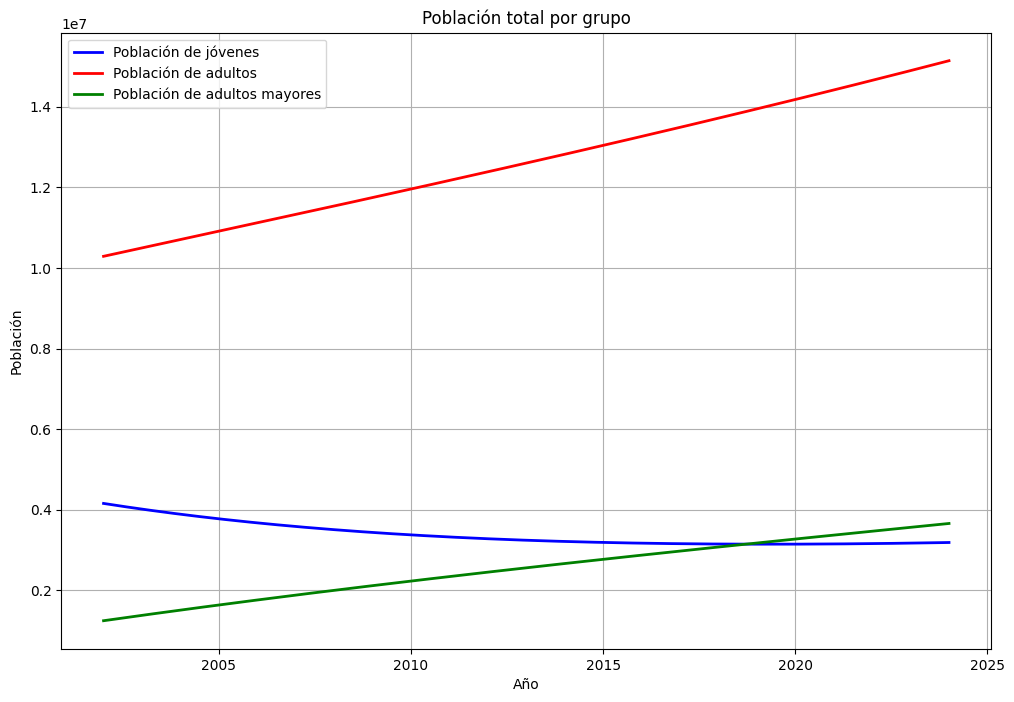

In [54]:
# Graficación por Runge-Kutta 4 (consistente en el orden del estado)
import numpy as np
import matplotlib.pyplot as plt

def sistema_edos(t, y):
    # y = [J, A, E]
    jt, at, et = y

    # COEFICIENTES
    c1 = 0.0181  # tasa de natalidad
    c2 = 0.0140  # tasa de mortalidad jóvenes
    c3 = -0.0321  # tasa de mortalidad adultos (positiva)
    c4 = 0.0567  # tasa de mortalidad mayores

    # ECUACIONES
    dyJ = c1*at - c2*jt - (1/15)*jt
    dyA = (1/50)*jt - c3*at - (1/50)*at
    dyE = (1/50)*at - c4*et
    return [dyJ, dyA, dyE]

def RK4(func, y0, t0, tf, h):
    t_values = np.arange(t0, tf + h, h)
    n = len(t_values)
    y_values = np.zeros((n, len(y0)), dtype=float)
    y_values[0] = y0

    for i in range(1, n):
        k1 = np.array(func(t_values[i-1], y_values[i-1]))
        k2 = np.array(func(t_values[i-1] + h/2, y_values[i-1] + h*k1/2))
        k3 = np.array(func(t_values[i-1] + h/2, y_values[i-1] + h*k2/2))
        k4 = np.array(func(t_values[i-1] + h,   y_values[i-1] + h*k3))
        y_values[i] = y_values[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t_values, y_values

# y0 = [J, A, E] en 2002
y0 = [4156812.0, 10288683.0, 1246206.0]
t0, tf, h = 0, 22, 0.01

t, y = RK4(sistema_edos, y0, t0, tf, h)

years = 2002 + t
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(years, y[:, 0], 'b-', linewidth=2, label='Población de jóvenes')
ax.plot(years, y[:, 1], 'r-', linewidth=2, label='Población de adultos')
ax.plot(years, y[:, 2], 'g-', linewidth=2, label='Población de adultos mayores')
ax.set_title('Población total por grupo')
ax.set_xlabel('Año')
ax.set_ylabel('Población')
ax.grid(True)
ax.legend()
plt.show()